# Exercise 2.5 Visual Applications of Machine Learning - Radar Recognition

### Contents:

#### 01. Import libraries and Data
#### 02. Model Architechture and Setup
#### 03. Model Compilation and Training
#### 04. Performance Evaluation
#### 05. Prediction Examples

## 01. Import Libraries and Data

In [6]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [7]:
# Create path to images
path = r'C:\Users\jenci\Documents\Data Analytics\Data Analytics\Machine Learning\Achievement 2\Achievment Project\02 Data\Prepared Data\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


### 02. Model Architecture and Setup

In [8]:
# Load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 730 images belonging to 4 classes.
Found 181 images belonging to 4 classes.


In [9]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

### 03. Model Compilation and Training

In [22]:
# Compile and run the model

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 15, 
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 299ms/step - accuracy: 0.8360 - loss: 0.0670 - val_accuracy: 0.7937 - val_loss: 0.0738
Epoch 2/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.0614 - val_accuracy: 0.8095 - val_loss: 0.0734
Epoch 3/15


C:\Users\jenci\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 283ms/step - accuracy: 0.9187 - loss: 0.0315 - val_accuracy: 0.7812 - val_loss: 0.0970
Epoch 4/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8750 - loss: 0.0503 - val_accuracy: 0.8095 - val_loss: 0.0807
Epoch 5/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 278ms/step - accuracy: 0.9170 - loss: 0.0349 - val_accuracy: 0.8250 - val_loss: 0.0569
Epoch 6/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.0144 - val_accuracy: 0.8571 - val_loss: 0.0649
Epoch 7/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step - accuracy: 0.9552 - loss: 0.0195 - val_accuracy: 0.8062 - val_loss: 0.0795
Epoch 8/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8571 - val_loss: 0.0571
Epoch 9/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step - accuracy: 0.9468 - loss: 0.0202 - val_accuracy: 0.8750 - val_loss: 0.0522
Epoch 10/15
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.7619 - val_loss: 0

In [26]:
results = pd.DataFrame(model.history.history)

### 04. Performance Evaluation

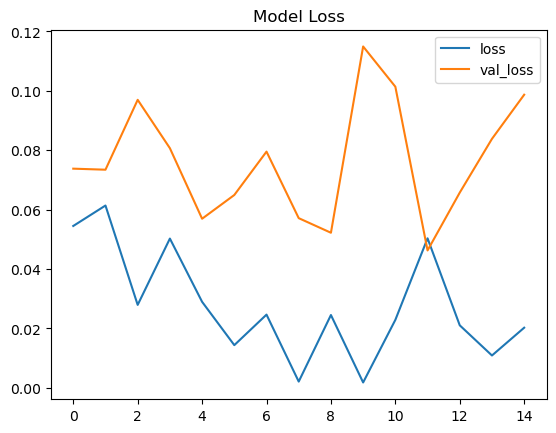

In [27]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

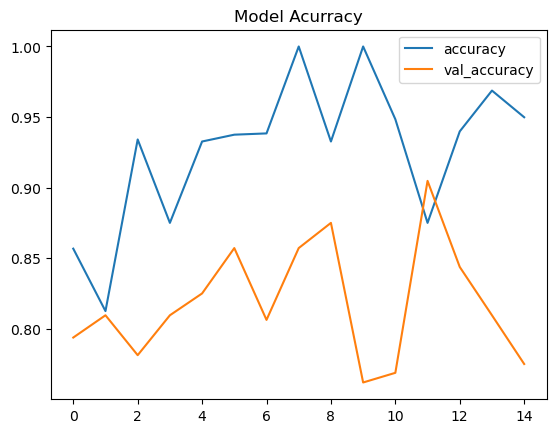

In [28]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [29]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9498567581176758, Val_Accuracy: 0.7749999761581421
Loss: 0.020261501893401146, Val_Loss: 0.09867922961711884


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


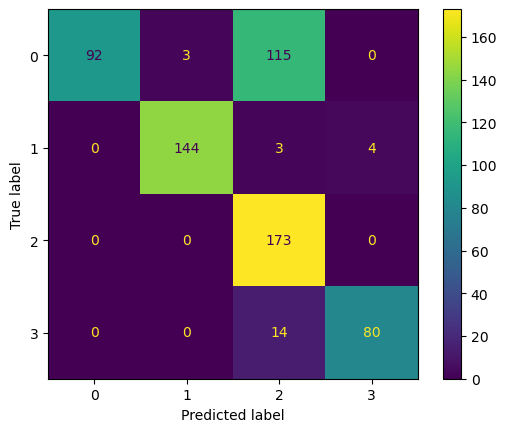

In [34]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 20 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### 05. Prediction Examples

In [35]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


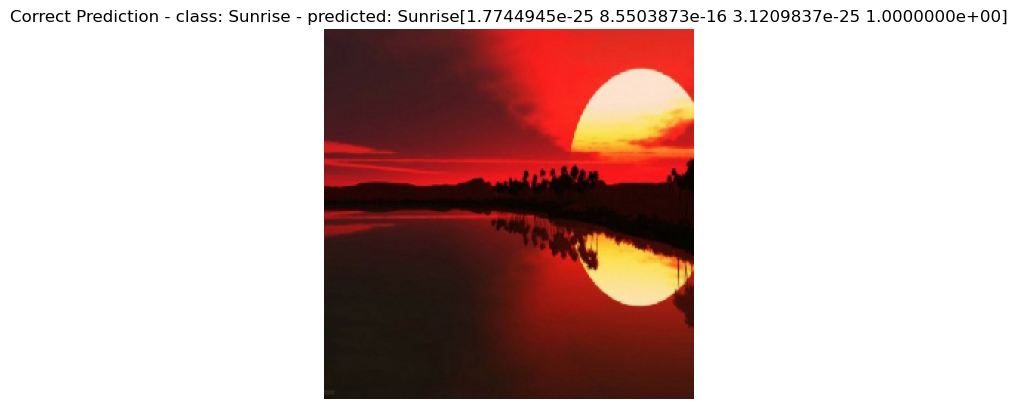

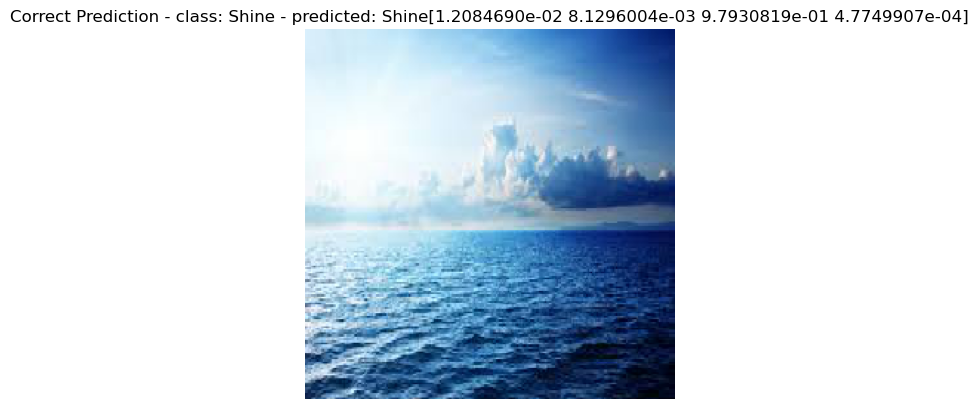

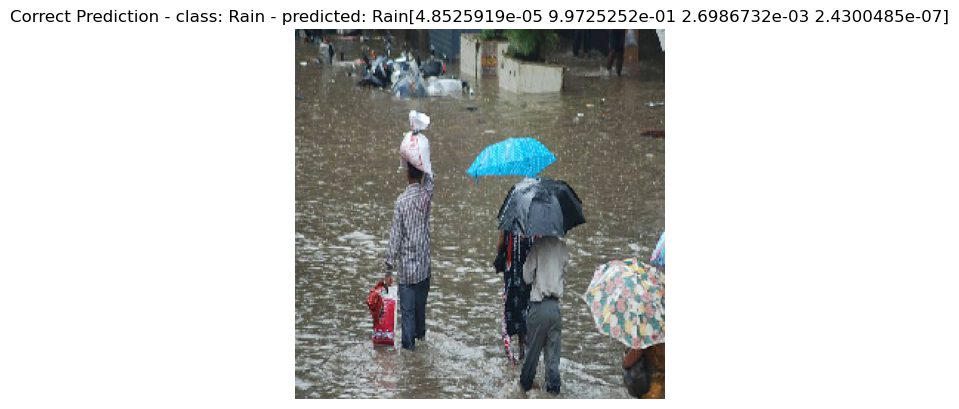

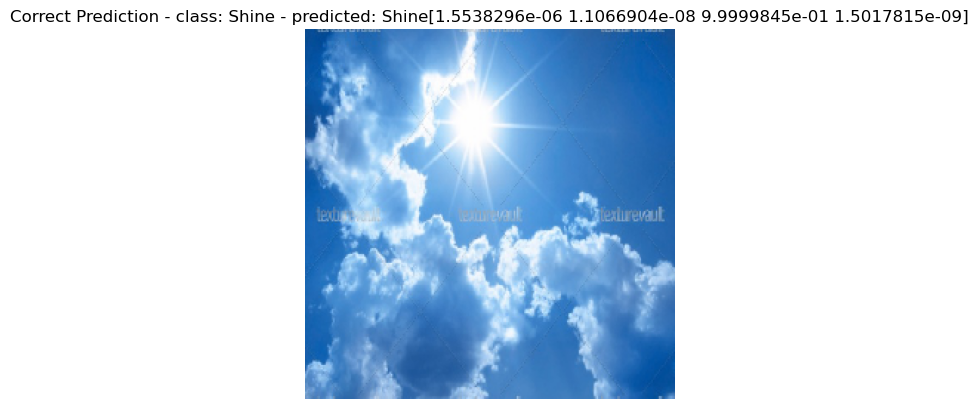

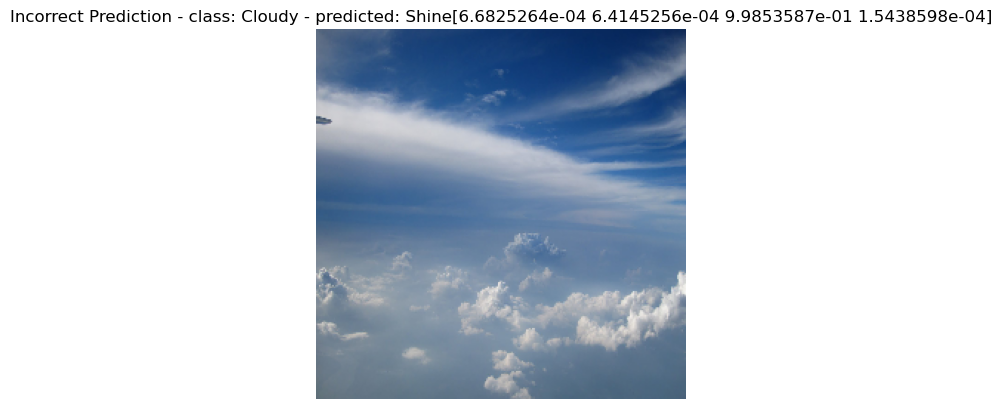

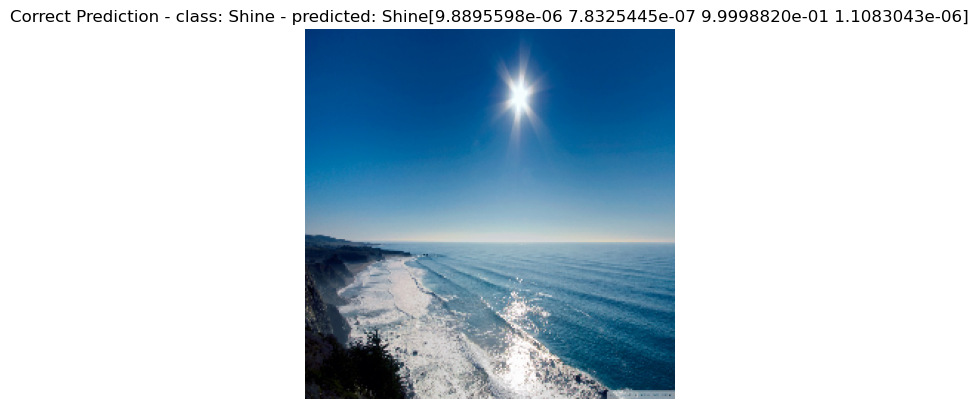

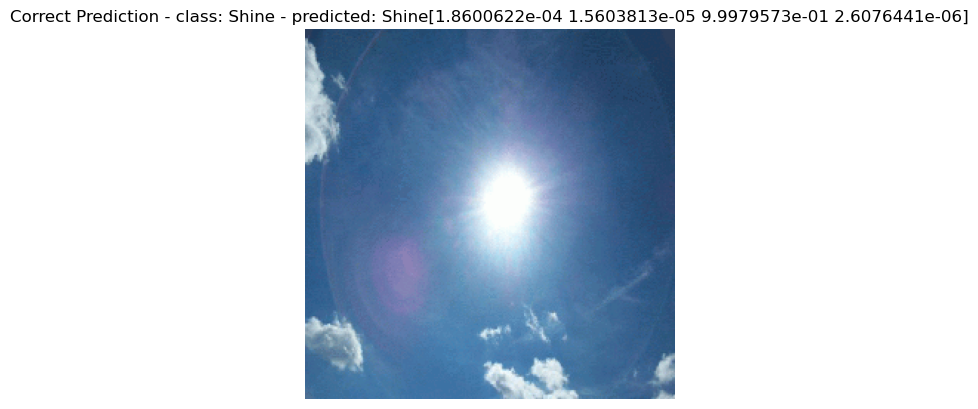

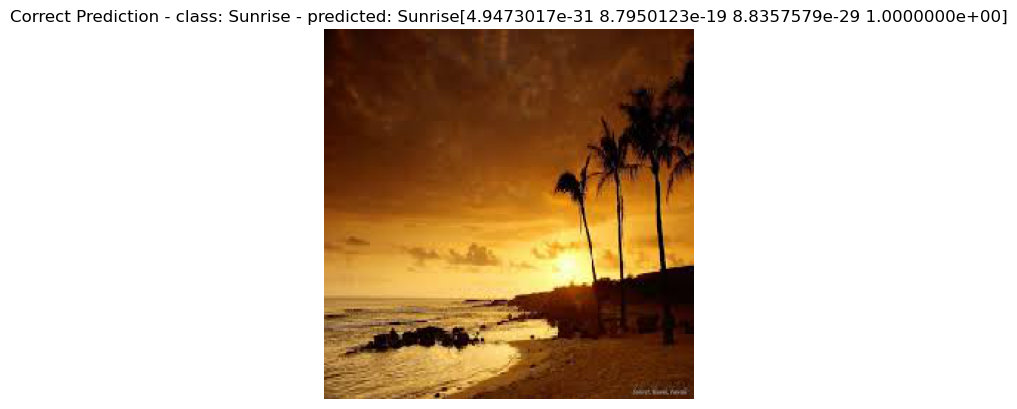

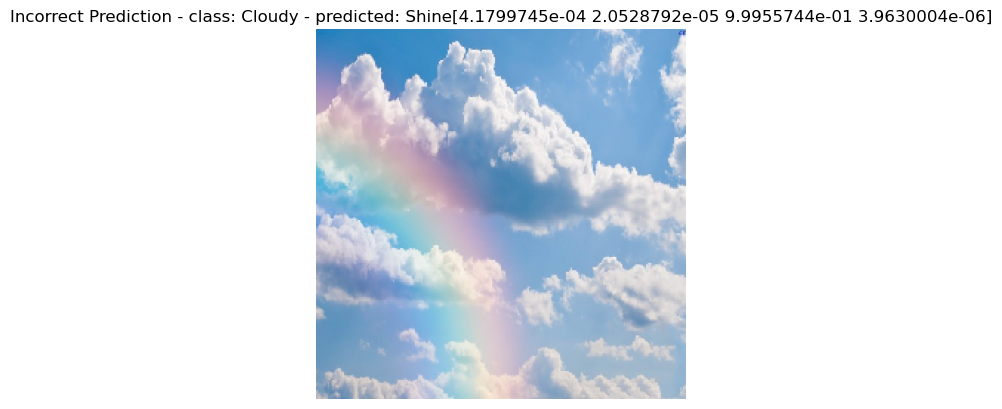

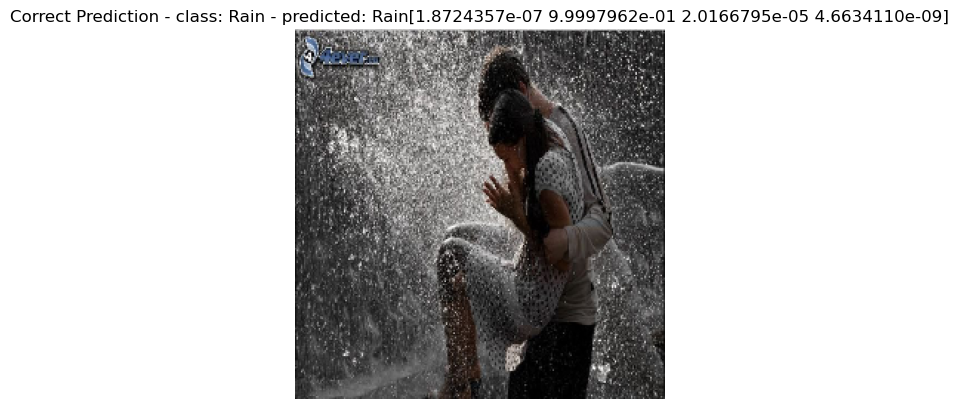

In [36]:
predict_one(model, 10) #<--you can show multiple pictures with this command. Just fill in the number you want to see.